<a href="https://colab.research.google.com/github/ritwiks9635/My_Neural_Network_Architecture/blob/main/Bi_GRU_with_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Word2Vec


Word2Vec is a popular natural language processing model for generating semantically rich vector representations of words. This model was developed by Tomas Mikolov in 2013 while he was working at Google. Word2Vec uses a machine learning approach called "distributed representation" to convert words to numbers in a multidimensional space.


The term "distributed representation" refers to the idea that each word is reflected as a vector, where the meaning of the word and its relationship to other words is reflected in the distance and direction of the vector. In Word2Vec, the vector representation of words is obtained through an unsupervised machine learning process using a large text corpus.


Word2Vec has two main architectures: Continuous Bag-of-Words (CBOW) and Skip-gram. In the CBOW architecture, the model learns to predict the target word based on the context of the given word around it. In contrast, the model learns to retain word context based on the given target word in the Skip-gram architecture.


Bidirectional GRU


Bidirectional GRU (Gated Recurrent Unit) is an architectural recurrence model used to process data sequences, such as text or time, taking into account the context before and after the point being processed. Bidirectional GRU combines two GRU units that work sequentially, one GRU unit running forward and one GRU unit running backward.


GRU is a type of recurrence unit similar to LSTM (Long Short-Term Memory). The GRU unit overcomes the problem of vanishing gradients and can retain long-term and short-term information in data sequences. GRU units use gates to regulate the information flow and control the interaction level between the unit cells and unit outputs.


In bidirectional GRU, the forward GRU unit processes the data sequence from start to finish, while the backward GRU unit processes the data sequence from end to start. This process allows the model to comprehensively understand the global context around each point in the data sequence.


Global Attention

Global Attention is essential in natural language processing and other data sequence modeling. This mechanism allows the model to pay greater attention to important parts of the data sequence when performing tasks such as machine translation or text processing. In language processing, Global Attention is often used in neural models such as Transformers.


The basic concept of Global Attention is to give weight to each element in sorting data based on the importance of that element for the task being performed. These weights are then used to calculate the data sequence's connection join or "context". This context representation allows the model to focus on relevant information and ignore unimportant information.

In [2]:
! unzip /content/https:/www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews/trip-advisor-hotel-reviews.zip

Archive:  /content/https:/www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews/trip-advisor-hotel-reviews.zip
  inflating: tripadvisor_hotel_reviews.csv  


In [3]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 15.6 MB/s eta 0:00:00


In [4]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("tripadvisor_hotel_reviews.csv")
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [6]:
data.rename(columns = {"Review" : "review", "Rating" : "sentiment"}, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     20491 non-null  object
 1   sentiment  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [8]:
data = data.replace({'sentiment' : {1:'negative', 2:'negative', 3:'neutral', 4:'positive', 5: 'positive' }})

In [9]:
data.head()

,review,sentiment
0,nice hotel expensive parking got good deal sta...,positive
1,ok nothing special charge diamond member hilto...,negative
2,nice rooms not 4* experience hotel monaco seat...,neutral
3,"unique, great stay, wonderful time hotel monac...",positive
4,"great stay great stay, went seahawk game aweso...",positive


In [10]:
data.sentiment.value_counts()

positive    15093
negative     3214
neutral      2184
Name: sentiment, dtype: int64

In [11]:
data = data[data.sentiment != "neutral"]

In [12]:
sentiment = data.sentiment.value_counts()

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

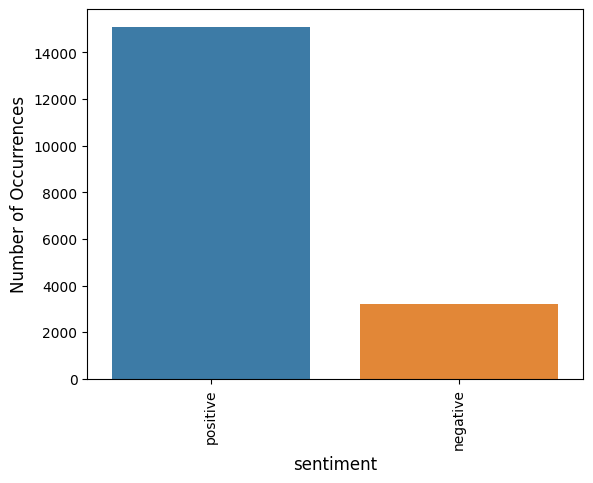

In [14]:
sns.barplot(x = sentiment.index, y = sentiment.values, alpha = 0.95)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('sentiment', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [15]:
from bs4 import BeautifulSoup

In [16]:
def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

def stopwords_removal(words):
    list_stopwords = nltk.corpus.stopwords.words('english')
    return [word for word in words if word not in list_stopwords]

In [17]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import tqdm
import unicodedata
import contractions

from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    #case folding
    doc = doc.lower()
    #remove special characters\whitespaces
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = remove_accented_chars(doc)
    doc = contractions.fix(doc)
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()
    #tokenize
    doc = word_tokenize(doc)
    #filtering
    doc = stopwords_removal(doc)
    norm_docs.append(doc)

  norm_docs = [" ".join(word) for word in norm_docs]
  return norm_docs

In [19]:
data.review = pre_process_corpus(data.review)

100%|██████████| 18307/18307 [00:36<00:00, 502.71it/s]


In [20]:
data.head()

,review,sentiment
0,nice hotel expensive parking got good deal sta...,positive
1,ok nothing special charge diamond member hilto...,negative
3,unique great stay wonderful time hotel monaco ...,positive
4,great stay great stay went seahawk game awesom...,positive
5,love monaco staff husband stayed hotel crazy w...,positive


Handling imbalance (oversampling)

In [21]:
from sklearn.utils import resample

In [22]:
majority = data[data.sentiment == "positive"]
minority = data[data.sentiment == "negative"]
print("majority class before upsample:",majority.shape)
print("minority class before upsample:",minority.shape)

majority class before upsample: (15093, 2)
minority class before upsample: (3214, 2)


In [23]:
# Upsample minority class
data_minority_upsampled = resample(minority,
                                 replace=True,     # sample with replacement
                                 n_samples= majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
data_balance = pd.concat([majority, data_minority_upsampled])

# Display new class counts
print("After upsampling\n",data_balance.sentiment.value_counts(),sep = "")

After upsampling
positive    15093
negative    15093
Name: sentiment, dtype: int64


In [24]:
data_balance.head()

,review,sentiment
0,nice hotel expensive parking got good deal sta...,positive
3,unique great stay wonderful time hotel monaco ...,positive
4,great stay great stay went seahawk game awesom...,positive
5,love monaco staff husband stayed hotel crazy w...,positive
6,cozy stay rainy city husband spent 7 nights mo...,positive


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.review, data.sentiment, test_size=0.1, random_state=42)
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((16476,), (1831,), (16476,), (1831,))

In [26]:
import tensorflow as tf
from tensorflow import keras

In [27]:
token = tf.keras.preprocessing.text.Tokenizer(oov_token = "<UNK>")
token.fit_on_texts(X_test)
token.word_index["<PAD>"] = 0
vocab_size = len(token.word_index)

In [28]:
train_seq = token.texts_to_sequences(X_train)
test_seq = token.texts_to_sequences(X_test)

In [29]:
print("Vocabulary size={}".format(len(token.word_index)))
print("Number of Documents={}".format(token.document_count))

Vocabulary size=18529
Number of Documents=1831


In [30]:
len(train_seq), len(test_seq)

(16476, 1831)

In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [32]:
sequence_length = 100
X_train = pad_sequences(train_seq, maxlen = sequence_length)
X_test = pad_sequences(test_seq, maxlen = sequence_length)

In [33]:
X_train.shape, X_test.shape

((16476, 100), (1831, 100))

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

Attention Mechanism¶
Attention Layer focuses on attending to the most important words. We sent all the states from our GRU model into the attention model.
The attention layer produces a context vector

In [36]:
from keras.layers import Layer
from keras import backend as K


class AttentionLayer(Layer):

    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):

        self.supports_masking = True
        self.init = keras.initializers.get('glorot_uniform')

        self.W_regularizer = keras.regularizers.get(W_regularizer)
        self.b_regularizer = keras.regularizers.get(b_regularizer)

        self.W_constraint = keras.constraints.get(W_constraint)
        self.b_constraint = keras.constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(AttentionLayer, self).__init__(**kwargs)


    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight(shape=(input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True


    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None


    def call(self, x, mask=None):
        # TF backend doesn't support it
        # eij = K.dot(x, self.W)
        # features_dim = self.W.shape[0]
        # step_dim = x._keras_shape[1]

        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                              K.reshape(self.W, (features_dim, 1))),
                        (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        a = K.expand_dims(a)
        weighted_input = x * a

        return K.sum(weighted_input, axis=1)


    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim


    def get_config(self):
        config = {'step_dim': self.step_dim}
        base_config = super(AttentionLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [37]:
import keras
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model
from keras.layers import Input, Embedding, Bidirectional, Concatenate, Dense, Dropout, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNGRU
EMBEDDING_DIM = 300 # dimension for dense embeddings for each token
GRU_DIM = 32 # total GRU units

sequence_input = Input(shape=(sequence_length,))
embedded_sequences = Embedding(vocab_size, EMBEDDING_DIM, trainable=True)(sequence_input)
bigru = Bidirectional(CuDNNGRU(GRU_DIM, return_sequences=True))(embedded_sequences)
#bigru = keras.layers.Bidirectional(keras.layers.GRU(GRU_DIM, return_sequences=True, recurrent_dropout=0.2))(embedded_sequences)
att = AttentionLayer(sequence_length)(bigru)
dense1 = Dense(GRU_DIM*2, activation='relu')(att)
dropout1 = Dropout(rate=0.3)(dense1)
dense2= Dense(GRU_DIM, activation='relu')(dropout1)
dropout2 = Dropout(rate=0.3)(dense2)

outp = keras.layers.Dense(1, activation='sigmoid')(dense2)
# initialize the model
model = keras.models.Model(inputs=sequence_input, outputs=outp)


model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [38]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 300)          5558700   
                                                                 
 bidirectional (Bidirection  (None, 100, 64)           64128     
 al)                                                             
                                                                 
 attention_layer (Attention  (None, 64)                164       
 Layer)                                                          
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0     

In [39]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

epochs = 100
batch_size = 128

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('./best_model/best_model_gru.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history = model.fit(X_train, y_train,  batch_size=batch_size, shuffle=True, validation_split=0.1, epochs=epochs, verbose=1, callbacks=[es, mc])

Epoch 1/100
116/116 [==============================] - ETA: 0s - loss: 0.3405 - accuracy: 0.8677
Epoch 1: val_accuracy improved from -inf to 0.92961, saving model to ./best_model/best_model_gru.h5
116/116 [==============================] - 33s 210ms/step - loss: 0.3405 - accuracy: 0.8677 - val_loss: 0.1778 - val_accuracy: 0.9296
Epoch 2/100
116/116 [==============================] - ETA: 0s - loss: 0.1101 - accuracy: 0.9593
Epoch 2: val_accuracy improved from 0.92961 to 0.93993, saving model to ./best_model/best_model_gru.h5
116/116 [==============================] - 15s 132ms/step - loss: 0.1101 - accuracy: 0.9593 - val_loss: 0.1715 - val_accuracy: 0.9399
Epoch 3/100
116/116 [==============================] - ETA: 0s - loss: 0.0520 - accuracy: 0.9816
Epoch 3: val_accuracy did not improve from 0.93993
116/116 [==============================] - 14s 123ms/step - loss: 0.0520 - accuracy: 0.9816 - val_loss: 0.2333 - val_accuracy: 0.9333
Epoch 4/100
116/116 [==============================] 

In [40]:
from keras.models import load_model

# Final evaluation of the model
# load the saved model
saved_model = load_model('./best_model/best_model_gru.h5', custom_objects={'AttentionLayer': AttentionLayer})
train_acc = saved_model.evaluate(X_train, y_train, verbose=1)
test_acc = saved_model.evaluate(X_test, y_test, verbose=1)
print('Train: %.2f%%, Test: %.2f%%' % (train_acc[1]*100, test_acc[1]*100))

58/58 [==============================] - 0s 7ms/step - loss: 0.1861 - accuracy: 0.9317
Train: 98.05%, Test: 93.17%
